
# [3](https://r4ds.had.co.nz/data-visualisation.html)&nbsp;&nbsp;&nbsp;Data visualisation

## [3.1](https://r4ds.had.co.nz/data-visualisation.html#introduction-1)&nbsp;&nbsp;&nbsp;Introduction

> "The simple graph has brought more information to the data analyst’s mind 
> than any other device." --- John Tukey

This blog post will teach you how to visualise your data using plotnine. Python has many packages for making graphs, but plotnine is one of the most elegant and most versatile. plotnine implements the __grammar of graphics__, a coherent system for describing and building graphs. With plotnine, you can do more faster by learning one system and applying it in many places.

If you'd like to learn more about the theoretical underpinnings of plotnine before you start, I'd recommend reading [The Layered Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.pdf).  
### [3.1.1](https://r4ds.had.co.nz/data-visualisation.html#prerequisites-1)&nbsp;&nbsp;&nbsp;Prerequisites

This chapter focusses on plotnine. To access the datasets, help pages, and functions that we will use in this blog post, import the package by running this code:

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd
from matplotlib import rcParams

pd.set_option("display.max_rows", 10)
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight",
                 "savefig.dpi": 300,
                 "savefig.format": "svg",
                 "text.usetex": True})
                 
theme_set(theme_gray(base_size=13))

This code imports the necessary packages and changes a few settings that are related to how DataFrames and figures are displayed. If you run this code and get the error message "ModuleNotFoundError: No module named 'plotnine'", you'll need to first install it, then run the code once again.

In [2]:
! pip install plotnine[all]

You only need to install a package once, but you need to reload it every time you start a new session.

## [3.2](https://r4ds.had.co.nz/data-visualisation.html#first-steps)&nbsp;&nbsp;&nbsp;First steps

Let's use our first graph to answer a question: Do cars with big engines use more fuel than cars with small engines? You probably already have an answer, but try to make your answer precise. What does the relationship between engine size and fuel efficiency look like? Is it positive? Negative? Linear? Nonlinear?

### [3.2.1](https://r4ds.had.co.nz/data-visualisation.html#the-mpg-data-frame)&nbsp;&nbsp;&nbsp;The `mpg` DataFrame

You can test your answer with the `mpg` __DataFrame__ found in plotnine (aka  `plotnine::mpg`). A DataFrame is a rectangular collection of variables (in the columns) and observations (in the rows). `mpg` contains observations collected by the US Environmental Protection Agency on 38 models of car. 

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Among the variables in `mpg` are:

1. `displ`, a car's engine size, in litres.

1. `hwy`, a car's fuel efficiency on the highway, in miles per gallon (mpg). 
  A car with a low fuel efficiency consumes more fuel than a car with a high 
  fuel efficiency when they travel the same distance. 

To learn more about `mpg`, open its help page by running `?mpg`.

### [3.2.2](https://r4ds.had.co.nz/data-visualisation.html#creating-a-ggplot)&nbsp;&nbsp;&nbsp;Creating a ggplot

To plot `mpg`, run this code to put `displ` on the x-axis and `hwy` on the y-axis:

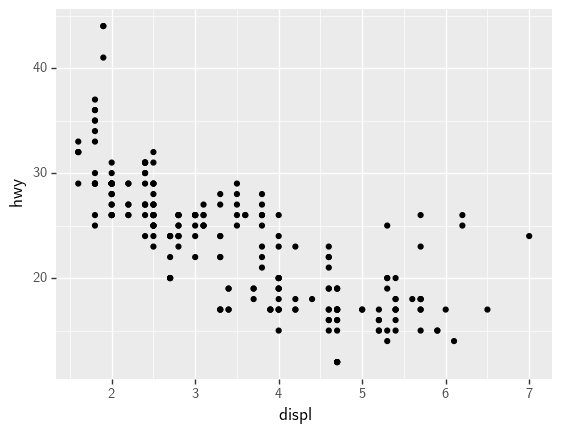

<ggplot: (295659561)>

In [4]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

The plot shows a negative relationship between engine size (`displ`) and fuel efficiency (`hwy`). In other words, cars with big engines use more fuel. Does this confirm or refute your hypothesis about fuel efficiency and engine size?

With plotnine, you begin a plot with the function `ggplot()`. `ggplot()` creates a coordinate system that you can add layers to. The first argument of `ggplot()` is the dataset to use in the graph. So `ggplot(data=mpg)` creates an empty graph, but it's not very interesting so I'm not going to show it here.

You complete your graph by adding one or more layers to `ggplot()`. The function `geom_point()` adds a layer of points to your plot, which creates a scatterplot. plotnine comes with many geom functions that each add a different type of layer to a plot. You'll learn a whole bunch of them throughout this chapter.

Each geom function in plotnine takes a `mapping` argument. This defines how variables in your dataset are mapped to visual properties. The `mapping` argument is always paired with `aes()`, and the `x` and `y` arguments of `aes()` specify which variables to map to the x and y axes. plotnine looks for the mapped variables in the `data` argument, in this case, `mpg`.

### [3.2.3](https://r4ds.had.co.nz/data-visualisation.html#a-graphing-template)&nbsp;&nbsp;&nbsp;A graphing template

Let's turn this code into a reusable template for making graphs with plotnine. To make a graph, replace the bracketed sections in the code below with a dataset, a geom function, or a collection of mappings.

In [5]:
# ggplot(data=<DATA>) +\
# <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>))

The rest of this chapter will show you how to complete and extend this template to make different types of graphs. We will begin with the `<MAPPINGS>` component.

### [3.2.4](https://r4ds.had.co.nz/data-visualisation.html#exercises)&nbsp;&nbsp;&nbsp;Exercises

1.  Run `ggplot(data=mpg)`. What do you see?

1.  How many rows are in `mpg`? How many columns?

1.  What does the `drv` variable describe?  Read the help for `?mpg` to find
    out.
     
1.  Make a scatterplot of `hwy` vs `cyl`.

1.  What happens if you make a scatterplot of `class` vs `drv`? Why is
    the plot not useful?

## [3.3](https://r4ds.had.co.nz/data-visualisation.html#aesthetic-mappings)&nbsp;&nbsp;&nbsp;Aesthetic mappings

> "The greatest value of a picture is when it forces us to notice what we
> never expected to see." --- John Tukey

In the plot below, one group of points (highlighted in red) seems to fall outside of the linear trend. These cars have a higher mileage than you might expect. How can you explain these cars? 

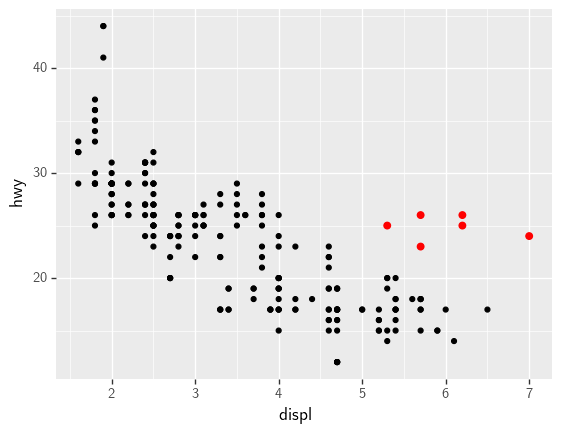

<ggplot: (274764937)>

In [6]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point() +\
geom_point(data=mpg.query("displ > 5 & hwy > 20"), colour="red", size=2.2)

Let's hypothesize that the cars are hybrids. One way to test this hypothesis is to look at the `class` value for each car. The `class` variable of the `mpg` dataset classifies cars into groups such as compact, midsize, and SUV. If the outlying points are hybrids, they should be classified as compact cars or, perhaps, subcompact cars (keep in mind that this data was collected before hybrid trucks and SUVs became popular).

You can add a third variable, like `class`, to a two dimensional scatterplot by mapping it to an __aesthetic__. An aesthetic is a visual property of the objects in your plot. Aesthetics include things like the size, the shape, or the color of your points. You can display a point (like the one below) in different ways by changing the values of its aesthetic properties. Since we already use the word "value" to describe data, let's use the word "level" to describe aesthetic properties. Here we change the levels of a point's size, shape, and color to make the point small, triangular, or blue:

<!-- ```{python, echo=FALSE, asp=1/4} -->
<!-- ggplot() +\ -->
<!-- geom_point(aes(1, 1), size=20) +\ -->
<!-- geom_point(aes(2, 1), size=10) +\ -->
<!-- geom_point(aes(3, 1), size=20, shape=17) +\ -->
<!-- geom_point(aes(4, 1), size=20, colour="blue") +\ -->
<!-- scale_x_continuous(limits=(0.5, 4.5), labels=None) +\ -->
<!-- scale_y_continuous(limits=(0.9, 1.1), labels=None) +\ -->
<!-- theme(aspect_ratio=1/3) -->
<!-- ``` -->

You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset. For example, you can map the colors of your points to the `class` variable to reveal the class of each car.

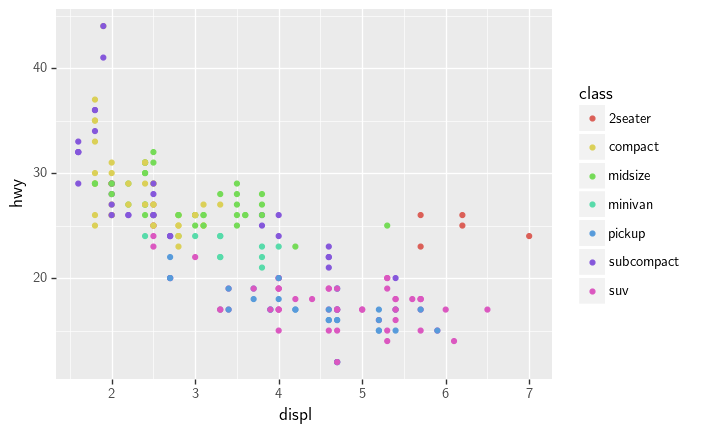

<ggplot: (295659769)>

In [7]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color="class"))

(If you prefer British English, like Hadley, you can use `colour` instead of `color`.)

To map an aesthetic to a variable, associate the name of the aesthetic to the name of the variable inside `aes()`. plotnine will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as __scaling__. plotnine will also add a legend that explains which levels correspond to which values.

The colors reveal that many of the unusual points are two-seater cars. These cars don't seem like hybrids, and are, in fact, sports cars! Sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage. In hindsight, these cars were unlikely to be hybrids since they have large engines.

In the above example, we mapped `class` to the color aesthetic, but we could have mapped `class` to the size aesthetic in the same way. In this case, the exact size of each point would reveal its class affiliation. We get a _warning_ here, because mapping an unordered variable (`class`) to an ordered aesthetic (`size`) is not a good idea.

/Users/jeroen/repos/datascienceworkshops/r4ds-python-plotnine/venv/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


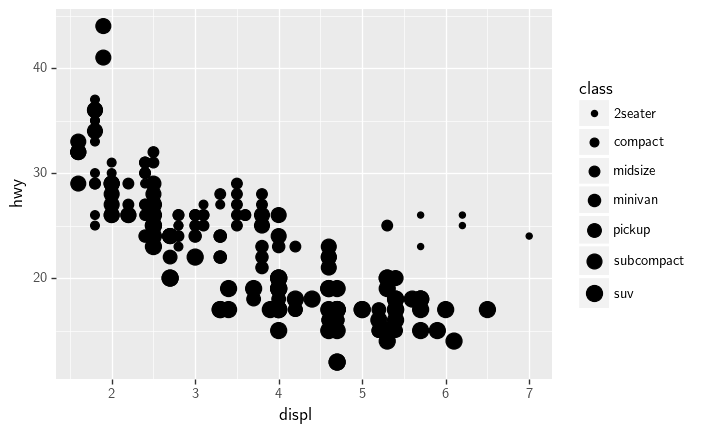

<ggplot: (295378821)>

In [8]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", size="class"))

Or we could have mapped `class` to the _alpha_ aesthetic, which controls the transparency of the points, or to the shape aesthetic, which controls the shape of the points.
